In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization
import matplotlib.pyplot as plt

In [3]:
tf.random.set_seed(37)

In [7]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='training_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])+10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [6]:
file = "/content/drive/MyDrive/data.csv"
array = np.genfromtxt(file, delimiter=",")

In [8]:
array.shape

(155, 12)

In [9]:
array[11][5:10], array[11]

(array([8.20000000e+01, 2.40000000e+01, 7.90000000e+01, 5.90000000e+01,
        5.48271752e-02]),
 array([7.00000000e+00, 1.08576000e+02, 5.33160000e+01, 3.33100000e+00,
        9.79000000e+01, 8.20000000e+01, 2.40000000e+01, 7.90000000e+01,
        5.90000000e+01, 5.48271752e-02, 8.70000000e+01, 9.30000000e+01]))

In [39]:
RATIO = 0.9 # train+validation / total
VAL_RATIO = 0.2 / RATIO
n_samples = array.shape[0]
len_train = int(n_samples*RATIO)
X_train = array[:len_train,:11]
Y_train = array[:len_train,11]
X_test = array[len_train:, :11]
Y_test = array[len_train:, 11]

In [29]:
def custom_activation(x):
    return tf.clip_by_value(x, 0, 100)

In [32]:
model = Sequential([
    Normalization(axis=-1, input_shape=(11, )),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation=custom_activation)
])
model.compile(loss="mean_absolute_error", optimizer=tf.keras.optimizers.Adam(0.001))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 11)                23        
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2904 (11.35 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 23 (96.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=4, validation_split=VAL_RATIO)

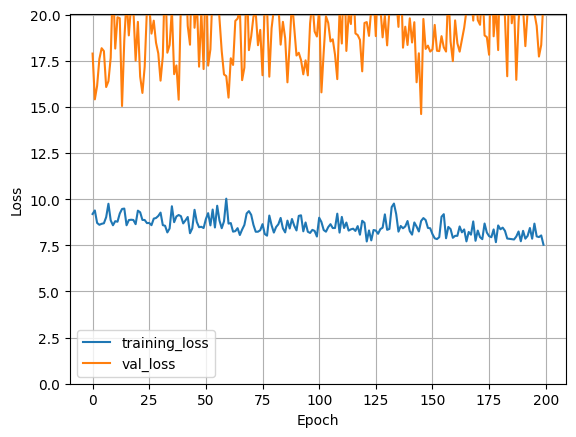

In [48]:
plot_loss(history)

In [49]:
loss = model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 37ms/step - loss: 14.7262


1/1 [==============================] - 0s 23ms/step


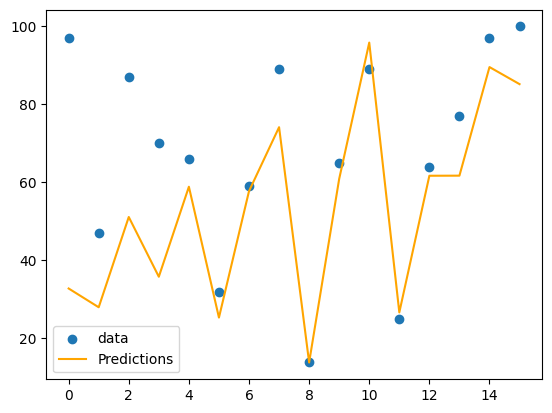

In [50]:
x = [i for i in range(0, len(Y_test))]
predictions = model.predict(X_test)
plt.scatter(x, Y_test, label="data")
plt.plot(x, predictions, label="Predictions", color="orange")
plt.legend()